<a href="https://colab.research.google.com/github/abhishek01bv/Insurance-Claim-Prediction/blob/main/InsClaim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
df.shape

(172834, 59)

In [ ]:
df.isnull().sum()

,0
id,0
target,0
ps_ind_01,0
ps_ind_02_cat,0
ps_ind_03,0
ps_ind_04_cat,0
ps_ind_05_cat,0
ps_ind_06_bin,0
ps_ind_07_bin,0
ps_ind_08_bin,0


In [ ]:
df.dropna(inplace=True)

* Removing null values

In [ ]:
df.isnull().sum()

,0
id,0
target,0
ps_ind_01,0
ps_ind_02_cat,0
ps_ind_03,0
ps_ind_04_cat,0
ps_ind_05_cat,0
ps_ind_06_bin,0
ps_ind_07_bin,0
ps_ind_08_bin,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172833 entries, 0 to 172832
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              172833 non-null  int64  
 1   target          172833 non-null  int64  
 2   ps_ind_01       172833 non-null  int64  
 3   ps_ind_02_cat   172833 non-null  int64  
 4   ps_ind_03       172833 non-null  int64  
 5   ps_ind_04_cat   172833 non-null  int64  
 6   ps_ind_05_cat   172833 non-null  int64  
 7   ps_ind_06_bin   172833 non-null  int64  
 8   ps_ind_07_bin   172833 non-null  int64  
 9   ps_ind_08_bin   172833 non-null  int64  
 10  ps_ind_09_bin   172833 non-null  int64  
 11  ps_ind_10_bin   172833 non-null  int64  
 12  ps_ind_11_bin   172833 non-null  int64  
 13  ps_ind_12_bin   172833 non-null  int64  
 14  ps_ind_13_bin   172833 non-null  int64  
 15  ps_ind_14       172833 non-null  int64  
 16  ps_ind_15       172833 non-null  int64  
 17  ps_ind_16_bin  

In [ ]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,...,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000,172833.000000
mean,216177.328265,0.036827,1.901327,1.357449,4.428882,0.416813,0.406982,0.393484,0.255622,0.164216,...,5.449555,1.442595,2.872530,7.531351,0.122673,0.629619,0.554761,0.287937,0.349742,0.154745
std,124621.463708,0.188339,1.984062,0.663787,2.701642,0.493314,1.352202,0.488524,0.436212,0.370473,...,2.329246,1.204107,1.695236,2.742966,0.328063,0.482908,0.496994,0.452803,0.476890,0.361662
min,7.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108188.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,216221.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,324036.000000,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,431938.000000,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,12.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
def outlier_detect(df):
  plotnumber = 1
  plt.figure(figsize=(20,15))
  for column in df.columns:
    plt.subplot(6,10,plotnumber)
    sns.boxplot(df[column])
    plotnumber+=1
  plt.tight_layout()


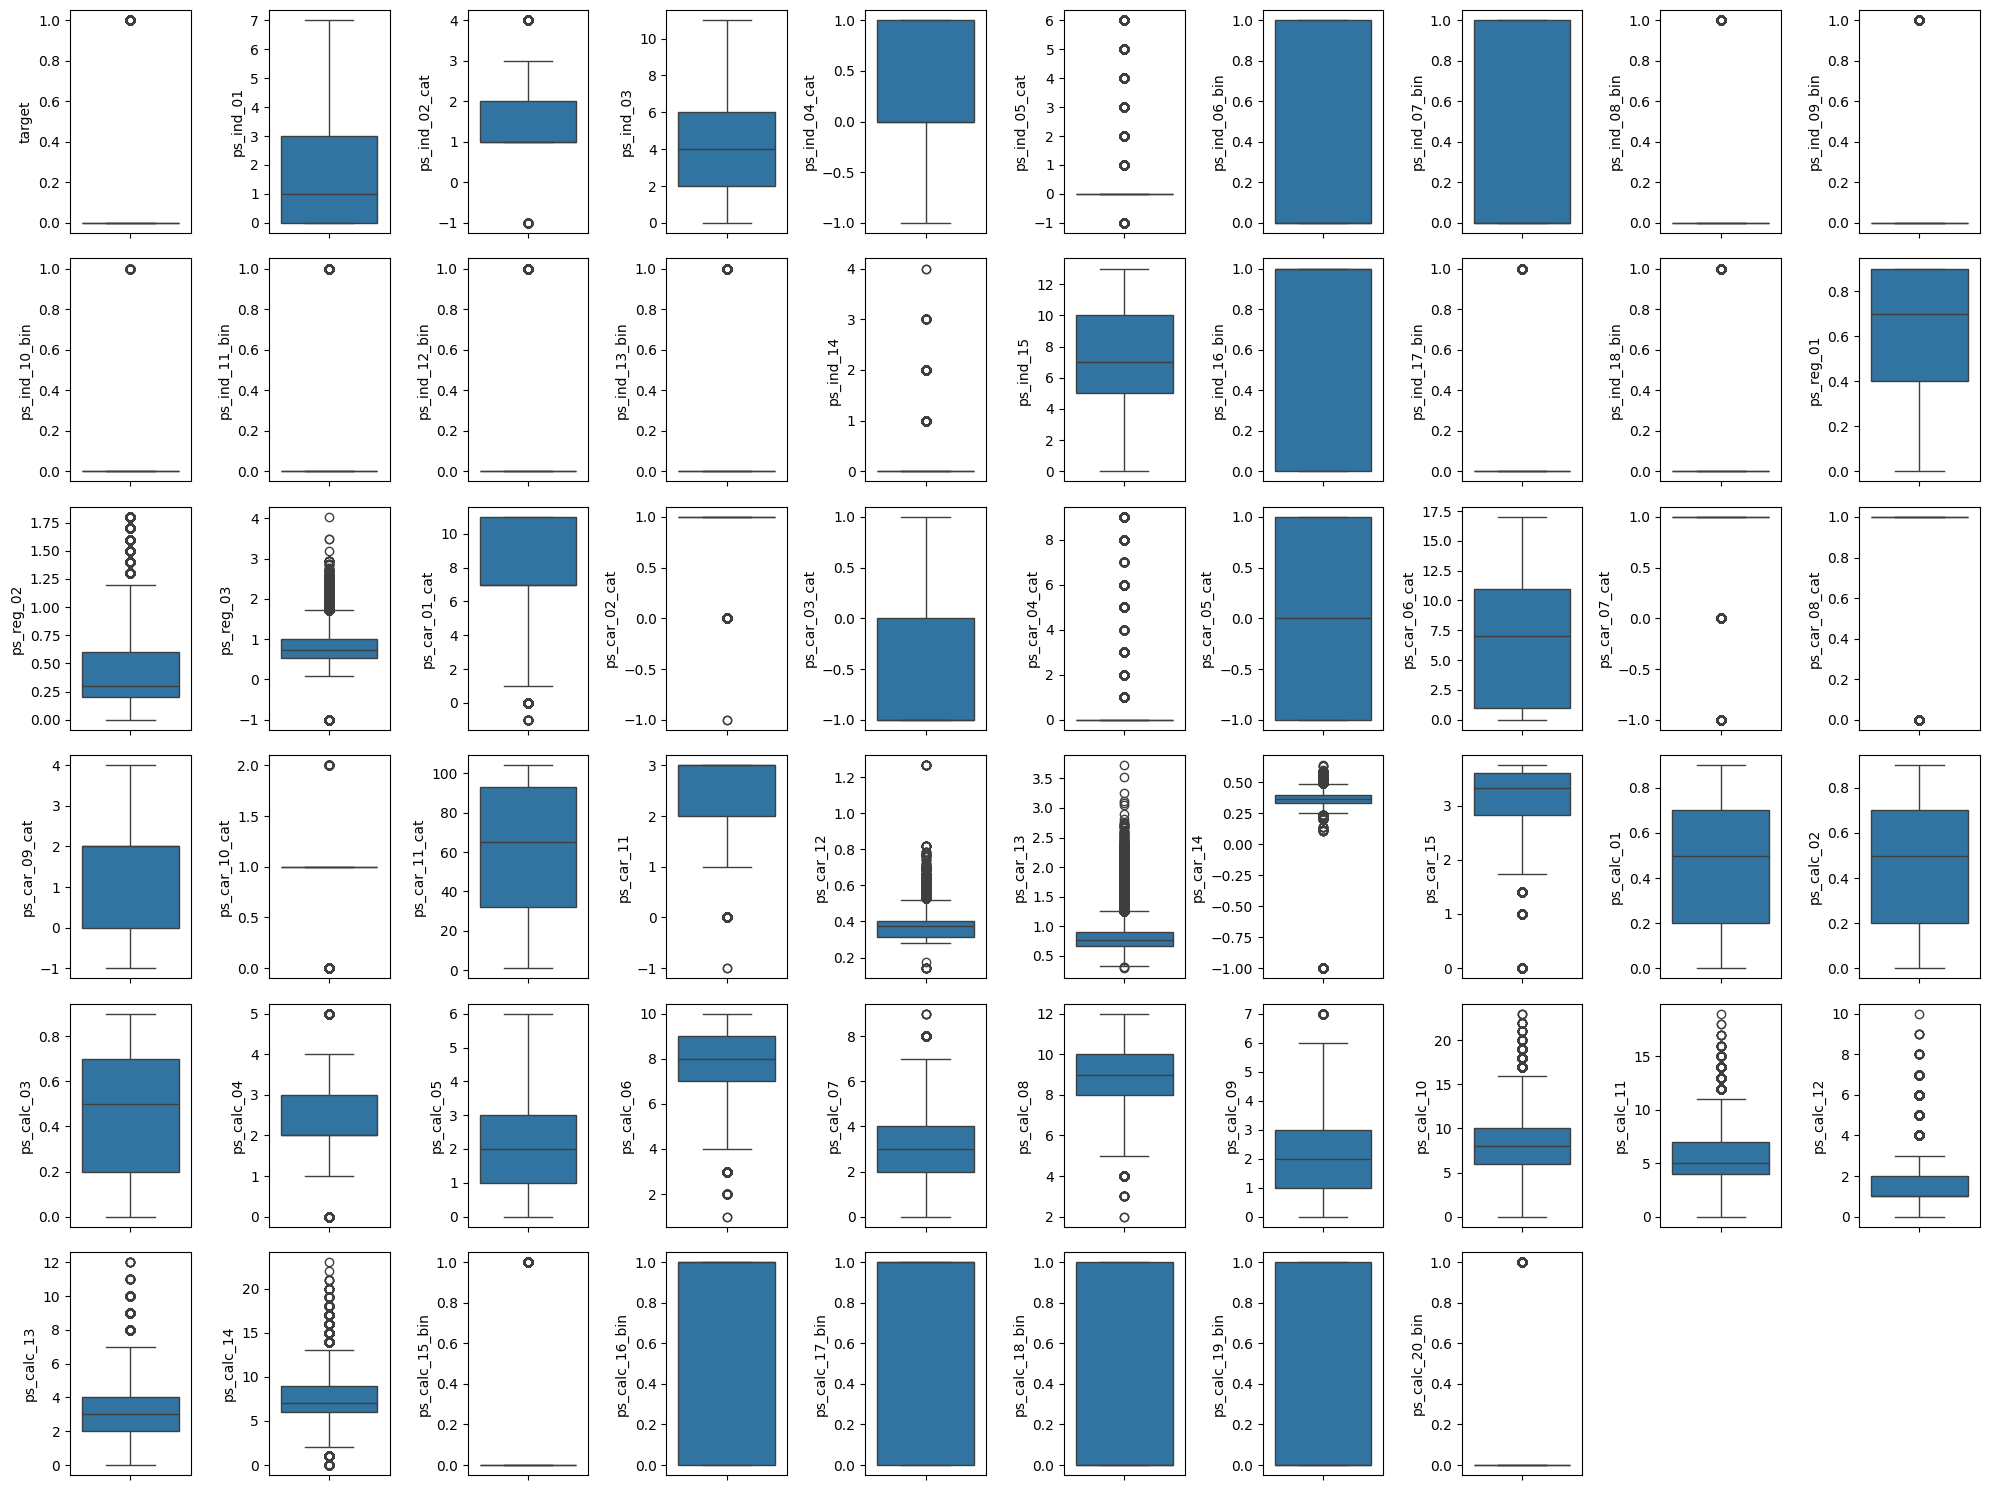

In [ ]:
outlier_detect(df)

#Function to Handle Outliers

In [ ]:
def remove_outlier(df):
  for column in df.drop('target', axis=1).columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    mean_val = df[column].mean()
    df[column] = np.where((df[column]<lower) | (df[column]>upper), mean_val,df[column])
  return df


In [ ]:
remove_outlier(df)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2.0,2.000000,5.0,1.0,0.000000,0.0,1.0,0.000000,0.0,...,9.0,1.000000,5.0,8.0,0.000000,1.0,1.0,0.0,0.0,0.154745
1,0,1.0,1.000000,7.0,0.0,0.000000,0.0,0.0,0.164216,0.0,...,3.0,1.000000,1.0,9.0,0.000000,1.0,1.0,0.0,1.0,0.000000
2,0,5.0,1.357449,9.0,1.0,0.000000,0.0,0.0,0.164216,0.0,...,4.0,2.000000,7.0,7.0,0.000000,1.0,1.0,0.0,1.0,0.000000
3,0,0.0,1.000000,2.0,0.0,0.000000,1.0,0.0,0.000000,0.0,...,2.0,2.000000,4.0,9.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0,0.0,2.000000,0.0,1.0,0.000000,1.0,0.0,0.000000,0.0,...,3.0,1.000000,1.0,3.0,0.000000,0.0,0.0,1.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172828,0,2.0,1.000000,3.0,0.0,0.000000,1.0,0.0,0.000000,0.0,...,7.0,0.000000,3.0,10.0,0.000000,0.0,1.0,1.0,0.0,0.154745
172829,0,1.0,1.000000,2.0,0.0,0.000000,1.0,0.0,0.000000,0.0,...,4.0,2.000000,2.0,8.0,0.122673,1.0,1.0,0.0,0.0,0.000000
172830,0,0.0,1.000000,1.0,0.0,0.000000,0.0,1.0,0.000000,0.0,...,5.0,0.000000,1.0,6.0,0.000000,1.0,0.0,0.0,0.0,0.000000
172831,0,0.0,1.000000,7.0,1.0,0.406982,0.0,1.0,0.000000,0.0,...,5.0,1.000000,1.0,10.0,0.000000,1.0,1.0,1.0,1.0,0.000000


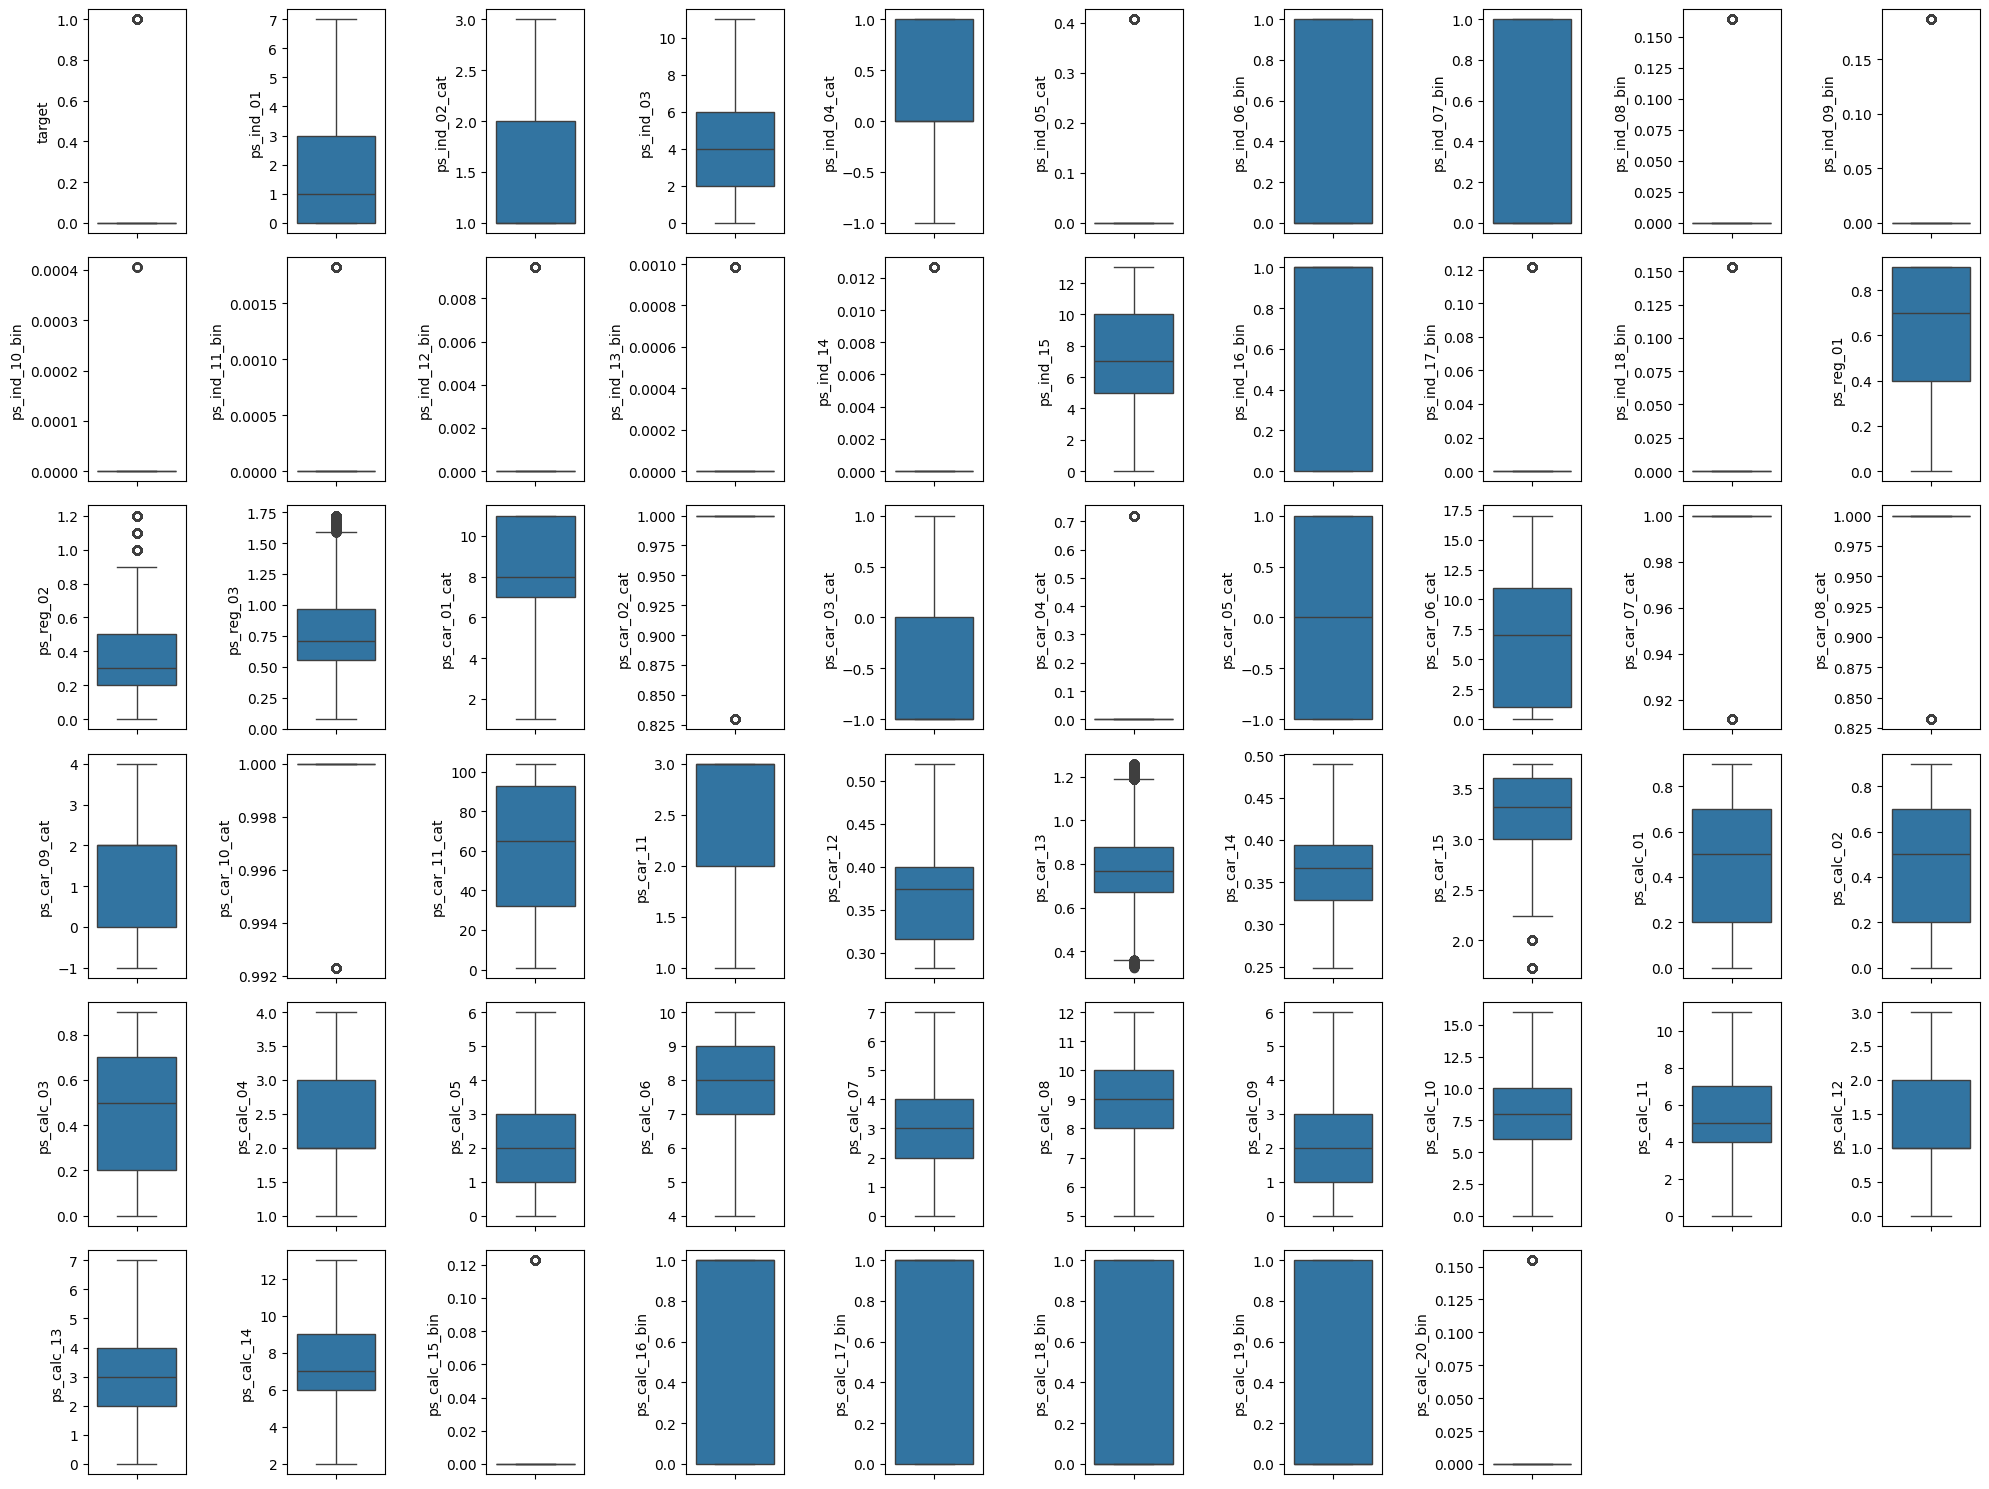

In [ ]:
outlier_detect(df)

In [ ]:
df['target'].value_counts()

,count
target,
0,166468
1,6365


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
y = df['target']
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
df.drop('target', axis=1,inplace=True)

In [ ]:
df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [ ]:
df_scaled.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.049733,1.255999,0.211397,1.182185,-0.35748,-0.805457,1.706464,-0.443263,-0.479087,-0.020129,...,1.640213,-0.284995,1.355882,0.244033,-0.373934,0.766982,0.895867,-0.635901,-0.733384,2.337147
1,-0.454285,-0.558989,0.951690,-0.844926,-0.35748,-0.805457,-0.586007,2.255998,-0.479087,-0.020129,...,-1.075312,-0.284995,-1.133298,0.649594,-0.373934,0.766982,0.895867,-0.635901,1.363543,-0.427872
2,1.561787,0.089777,1.691983,1.182185,-0.35748,-0.805457,-0.586007,2.255998,-0.479087,-0.020129,...,-0.622725,0.773710,2.600472,-0.161527,-0.373934,0.766982,0.895867,-0.635901,1.363543,-0.427872
3,-0.958303,-0.558989,-0.899042,-0.844926,-0.35748,1.241531,-0.586007,-0.443263,-0.479087,-0.020129,...,-1.527900,0.773710,0.733587,0.649594,-0.373934,-1.303812,-1.116237,-0.635901,-0.733384,-0.427872
4,-0.958303,1.255999,-1.639335,1.182185,-0.35748,1.241531,-0.586007,-0.443263,-0.479087,-0.020129,...,-1.075312,-0.284995,-1.133298,-1.783769,-0.373934,-1.303812,-1.116237,1.572572,1.363543,-0.427872


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05878877, 0.10401793, 0.14122091, 0.17678694, 0.20982937,
       0.24141344, 0.27066086, 0.29563522, 0.31849233, 0.33990024,
       0.35949289, 0.37886082, 0.39737938, 0.41550638, 0.43335495,
       0.45117793, 0.46893487, 0.48666434, 0.5043595 , 0.52205103,
       0.53970883, 0.55734587, 0.57495573, 0.59253952, 0.61009956,
       0.62761292, 0.6450959 , 0.66253813, 0.67997457, 0.69738852,
       0.71475913, 0.73211732, 0.74940326, 0.76666102, 0.78384038,
       0.80084204, 0.81761542, 0.83376648, 0.84922521, 0.86342944,
       0.87719853, 0.89075121, 0.90331035, 0.91507017, 0.92623674,
       0.93676289, 0.94693798, 0.95653294, 0.96575255, 0.97433391,
       0.98217787, 0.98918261, 0.99327514, 0.99709319, 0.99929236,
       1.        , 1.        ])

Text(0, 0.5, 'explained ratio')

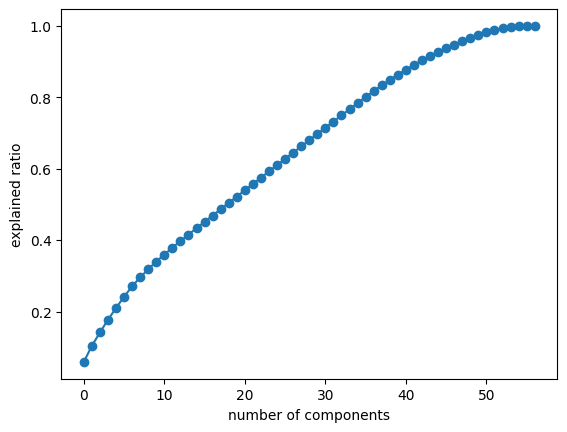

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlabel('number of components')
plt.ylabel('explained ratio')

* Due Dimensionality curse the accuracy of the reduce. Inorder to treat the curse of dimensionality we use Principle Component Analysis(PCA).

* PCA reduces the number of variables in a dataset while preserving as much of the original variance (information) as possible.

#Observation
* From the diagram above, it can be seen that 4 principal components explain almost 75% of the variance in data and 5 principal components explain around 98% of the variance in data.


In [ ]:
pca = PCA(n_components=5)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

In [ ]:
df_pca.columns = [f'PC{i+1}' for i in range(df_pca.shape[1])]

In [ ]:
X = df_pca

In [ ]:
X.head()

,PC1,PC2,PC3,PC4,PC5
0,1.575501,0.309566,-1.004216,-1.020764,0.163268
1,-1.015043,0.817416,0.740551,2.365610,-0.291475
2,-1.594273,-0.870018,-0.137599,-1.176224,2.852175
3,-2.465514,0.422074,1.052523,-0.983471,0.284945
4,-2.189833,-0.660853,1.695038,0.707911,-1.879771


#Model Creation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#Model Evaluation

In [ ]:
def model(model,x,y):
  model.fit(x,y)
  y_pred = model.predict(X_test)
  print('classification report')
  print(classification_report(y_test,y_pred))

#Logistic Regression

In [ ]:
model(LogisticRegression(), X_sm, y_sm)

classification report
              precision    recall  f1-score   support

           0       0.97      0.61      0.75     33290
           1       0.05      0.54      0.09      1277

    accuracy                           0.61     34567
   macro avg       0.51      0.57      0.42     34567
weighted avg       0.94      0.61      0.72     34567



#Decision Tree Classifier

In [ ]:
model(DecisionTreeClassifier(), X_sm, y_sm)

classification report
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     33290
           1       0.04      0.16      0.06      1277

    accuracy                           0.82     34567
   macro avg       0.50      0.51      0.48     34567
weighted avg       0.93      0.82      0.87     34567



#Random Forest Classifier

In [ ]:
model(RandomForestClassifier(), X_sm, y_sm)

classification report               precision    recall  f1-score   support

           0       0.96      0.95      0.95     33290
           1       0.04      0.06      0.05      1277

    accuracy                           0.91     34567
   macro avg       0.50      0.50      0.50     34567
weighted avg       0.93      0.91      0.92     34567



#Gradient Boosting Classifier

In [ ]:
model(GradientBoostingClassifier(), X_sm, y_sm)


classification report               precision    recall  f1-score   support

           0       0.97      0.61      0.75     33290
           1       0.05      0.55      0.09      1277

    accuracy                           0.61     34567
   macro avg       0.51      0.58      0.42     34567
weighted avg       0.94      0.61      0.72     34567



#KNeighbors Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3)
model(knn, X_sm, y_sm)

classification report               precision    recall  f1-score   support

           0       0.96      0.83      0.89     33290
           1       0.04      0.17      0.06      1277

    accuracy                           0.80     34567
   macro avg       0.50      0.50      0.48     34567
weighted avg       0.93      0.80      0.86     34567



#XGB Classifier

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb_r=XGBClassifier()
xgb_r.fit(X_sm,y_sm)
y_predict_xgb=xgb_r.predict(X_test)

In [ ]:
print(classification_report(y_test,y_predict_xgb))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79     33290
           1       0.05      0.43      0.08      1277

    accuracy                           0.66     34567
   macro avg       0.51      0.55      0.44     34567
weighted avg       0.93      0.66      0.76     34567



#Model Comparsion

Logistic Regression - 61%

Decision Tree Classifier - 82%

Random Forest Classifier - 91%

Gradient Boosting Classifier - 61%

KNeighbors Classifier - 80%

XGBoost Classifier - 66%



#Insight from Model Comparsion
* By comparing all the classification report outcomes, We can conclude that Random Forest Classifier is best performing algorithm.

* However we can observe that Decision Tree Classifier and KNeighbors Classifier are comparatively giving good results.